# Appendix C: Simulation of spiking neuron.

In [1]:
# Importing & relevant modules.
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import time


# Defining variables

In [ ]:
# Setting the time and space values.

# Creating the time steps.
dt = 0.05
T = 600

nt = round(T/dt)

# Creating the space steps.
L = 1000
dx = 5

nx = round( L/dx )


12000


# The model

* ## **Line 30 is the dendrite side equation.**

* ## **Line 33 is the axon side of the equation.**


In [ ]:
def simulate(DT=1.9, Lambda = 20, V_T=-57, E_l=-60, tau=20, V_th = -50):


  # Creating the baseline voltage of the neuron.
  V = E_l * np.ones( (2 * nx + 1, nt) )
  

  # Injecting current into the center of the neuron, to check the diffusion term.
  V[ nx + 10, :] = -45 * np.ones( (1, nt) )


  for k in range( 1,  nt ):

    # Injecting current into the center of the neuron, to check the diffusion term. This is to maintain the injected current.
    V[ nx + 10, :] = -45 * np.ones( (1, nt) )


    vv = np.concatenate( ( V[0, k - 1], V[ :, k - 1 ] ) , axis = None )
    vv = np.concatenate( ( vv, V[ 2 * nx , k - 1 ] ) , axis = None )
    
    dVdx = np.diff( vv )/dx

    d2Vdx2 = np.diff( dVdx )/dx
 
    d2Vdx2[0], d2Vdx2[9] = 0, 0 


    # Calculating the dendrite side of the neuron.
    V[ (nx):(2 * nx + 1), k] = V[ (nx):(2 * nx + 1), k - 1 ] + (dt/tau) * ( E_l * np.ones( nx + 1 ) - V[ (nx):(2 * nx + 1), k - 1 ] )
    
    # Calculating the axon side of the neuron using the EIF model.
    V[ 0:(nx + 1), k ] = V[ 0:(nx + 1), k - 1 ] + (dt/tau) * (  ( E_l * np.ones( nx + 1 )  - V[ 0:(nx + 1), k - 1 ] ) + DT * np.exp( ( V[ 0:(nx + 1), k - 1 ] - V_T * np.ones( nx + 1 ) ) / DT  ) )

    # Adding the diffusion coefficient.
    V[:, k] = V[:, k] + (dt/tau) * (Lambda ** 2) * d2Vdx2


    # Block of code that checks if threshold has been exceeded.
    V[ 0:(nx + 1), k ][ np.nonzero( V[ 0:(nx + 1), k ] > V_th) ] = V_th


  return V


# The model: variant 2 

In [ ]:
def simulate_new(DT=1.9, Lambda = 45, V_T=-56, E_l=-60, tau=20, V_th = -50, V1 = -52):


  # Creating the baseline voltage of the neuron.
  V = E_l * np.ones( (2 * nx + 1, nt) )
  

  # Injecting current into the center of the neuron, to check the diffusion term.
  V[ nx + 10, :] = -45 * np.ones( (1, nt) )


  for k in range( 1,  nt ):

    # Injecting current into the center of the neuron, to check the diffusion term. This is to maintain the injected current.
    V[ nx + 10, :] = -45 * np.ones( (1, nt) )


    vv = np.concatenate( ( V[0, k - 1], V[ :, k - 1 ] ) , axis = None )
    vv = np.concatenate( ( vv, V[ 2 * nx , k - 1 ] ) , axis = None )
    
    dVdx = np.diff( vv )/dx

    d2Vdx2 = np.diff( dVdx )/dx
 
    d2Vdx2[0], d2Vdx2[9] = 0, 0 


    # Calculating the dendrite side of the neuron.
    V[ (nx):(2 * nx + 1), k] = V[ (nx):(2 * nx + 1), k - 1 ] + (dt/tau) * ( E_l * np.ones( nx + 1 ) - V[ (nx):(2 * nx + 1), k - 1 ] )
    
    # Calculating the axon side of the neuron using the EIF model.
    V_growth = V[ 0:(nx + 1), k ][ np.nonzero( V[ 0:(nx + 1), k ] <= V_T) ]

    V[ 0:(nx + 1), k ][ np.nonzero( V[ 0:(nx + 1), k ] <= V_T) ] = V_growth + (dt/tau) * (  -V_growth + DT * np.exp( ( V_growth - V_T * np.ones( np.size( V_growth ) ) ) / DT  ) )

    V_spike = V[ 0:(nx + 1), k ][ np.nonzero( V[ 0:(nx + 1), k ] > V_T) ]

    #print( np.size(V[ 0:(nx + 1), k ][ np.nonzero( V[ 0:(nx + 1), k ] > V_T) ]), np.size(V_spike)  )

    V[ 0:(nx + 1), k ][ np.nonzero( V[ 0:(nx + 1), k ] > V_T) ] = V_spike + (dt/tau) * (   - V1 * np.ones( np.size(V_spike) ) + DT * np.exp( ( V1 * np.ones( np.size(V_spike) ) - V_T * np.ones( np.size(V_spike) ) ) / DT  ) )


    # Adding the diffusion coefficient.
    V[:, k] = V[:, k] + (dt/tau) * (Lambda ** 2) * d2Vdx2


    # Block of code that checks if threshold has been exceeded.
    V[ 0:(nx + 1), k ][ np.nonzero( V[ 0:(nx + 1), k ] > V_th) ] = V_th


  return V


# Plotting function

In [ ]:

def myplot(V, time_step = 2000):

  plt.figure(figsize=(28,8))
  plt.xlabel("x")
  plt.ylabel("Voltage")
  plt.title("Voltage of the neuron")
  plt.plot( np.linspace(-nx, nx, 2 * nx + 1), V[:, time_step], 'r-')

# **Testing a few values of DT**

DT = 1


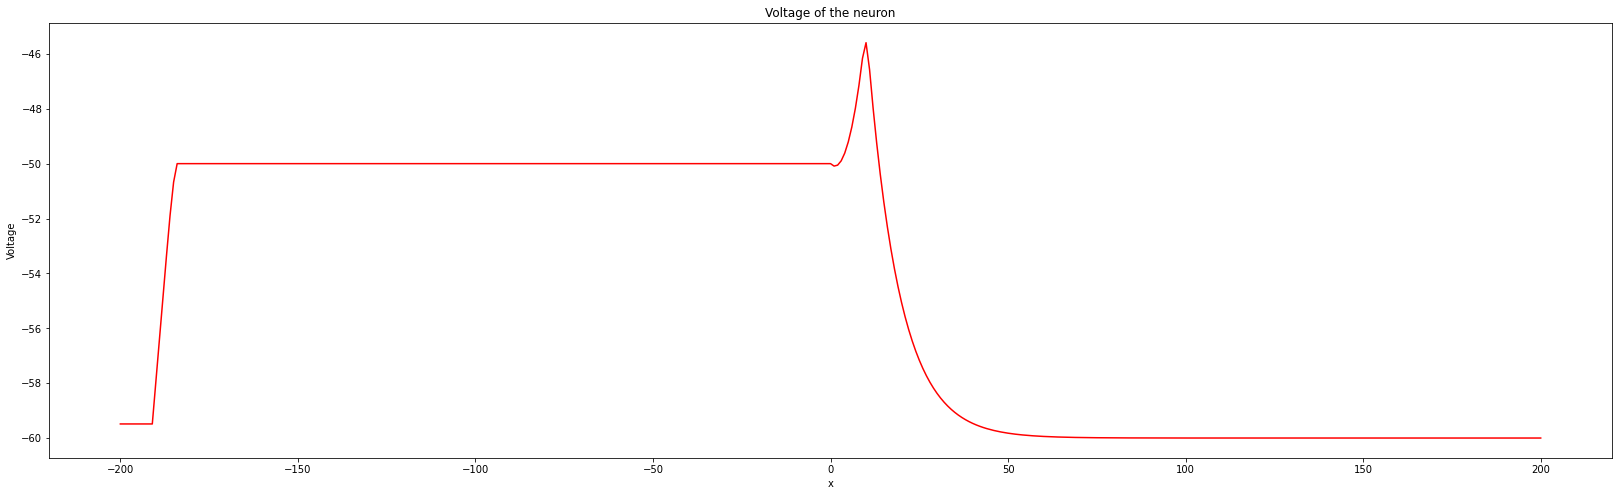

In [ ]:
V = simulate(DT = 1.9, Lambda = 45)
myplot(V, 199)

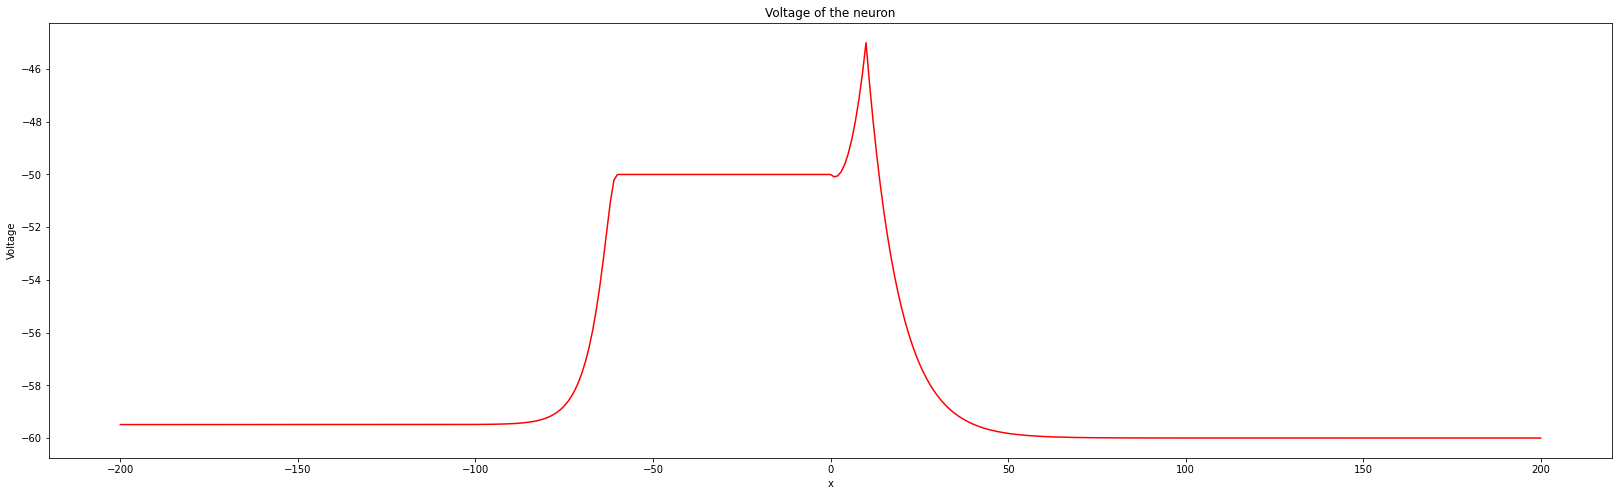

In [ ]:
myplot(V, 2999)

# Looking through different time steps

DT = 1


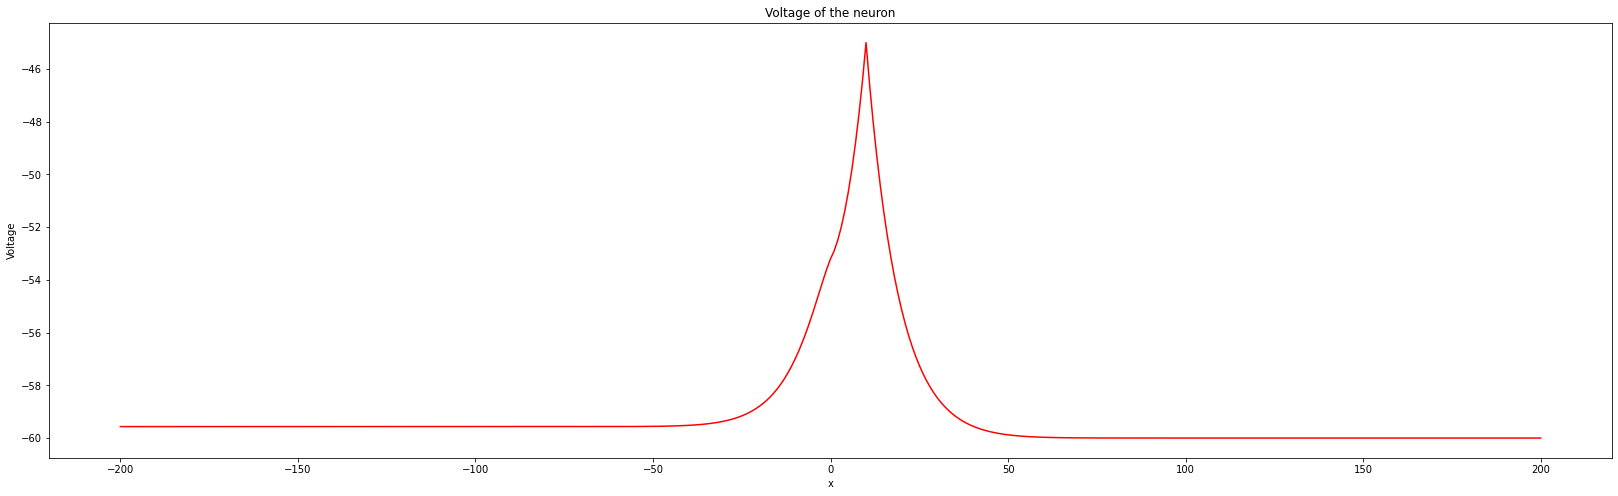

In [ ]:
V = simulate(DT = 1.9, Lambda = 45)
myplot(V, 999)

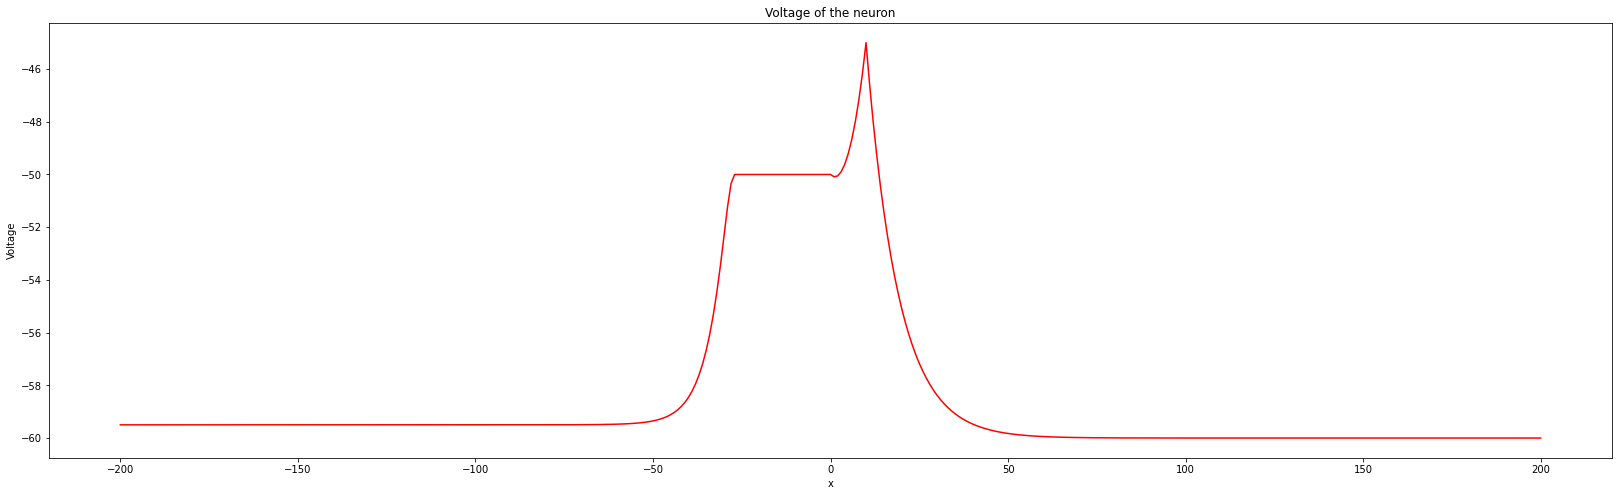

In [ ]:
myplot(V, 1999)

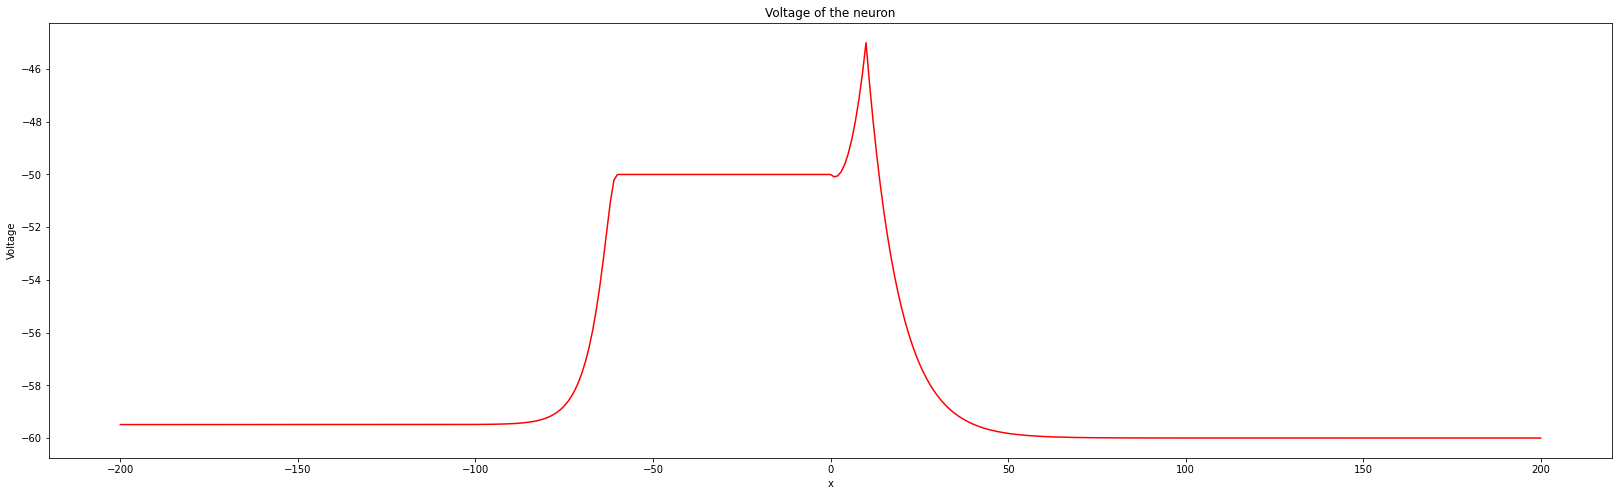

In [ ]:
myplot(V, 2999)

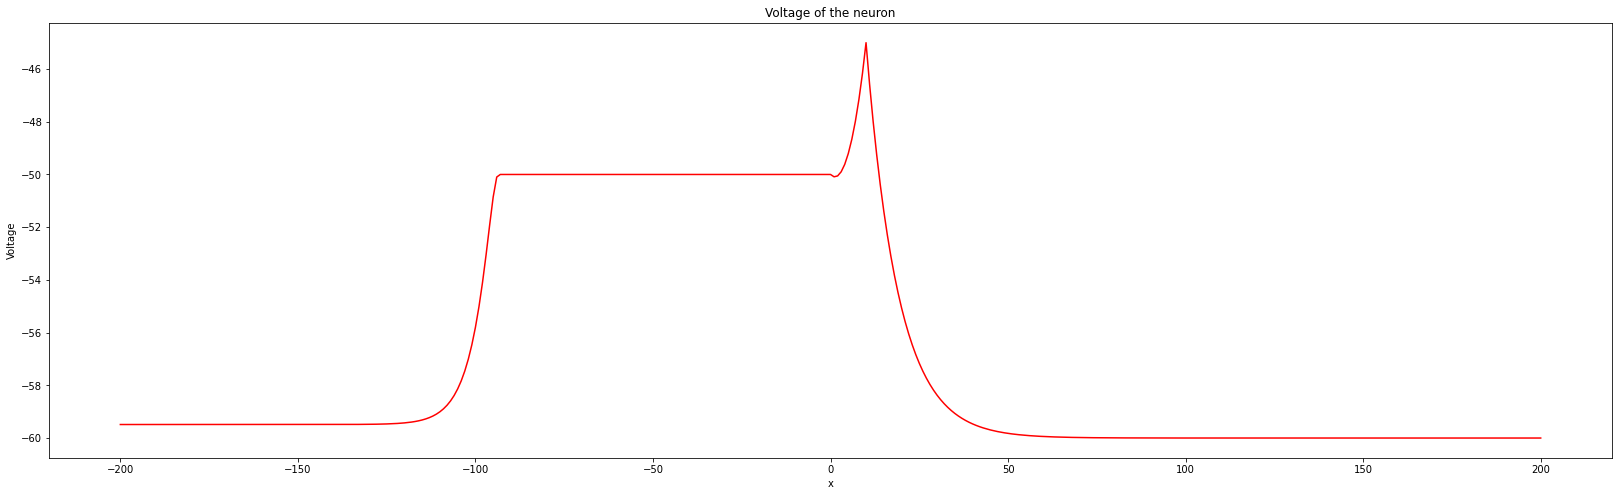

In [ ]:
myplot(V, 3999)

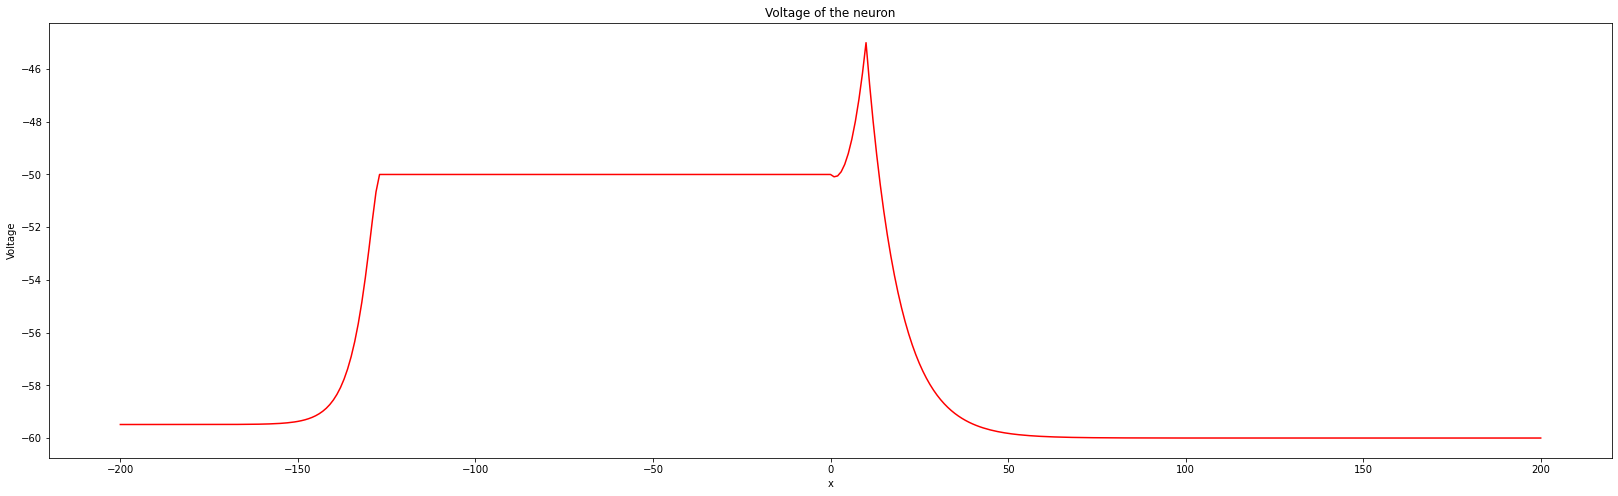

In [ ]:
myplot(V, 4999)

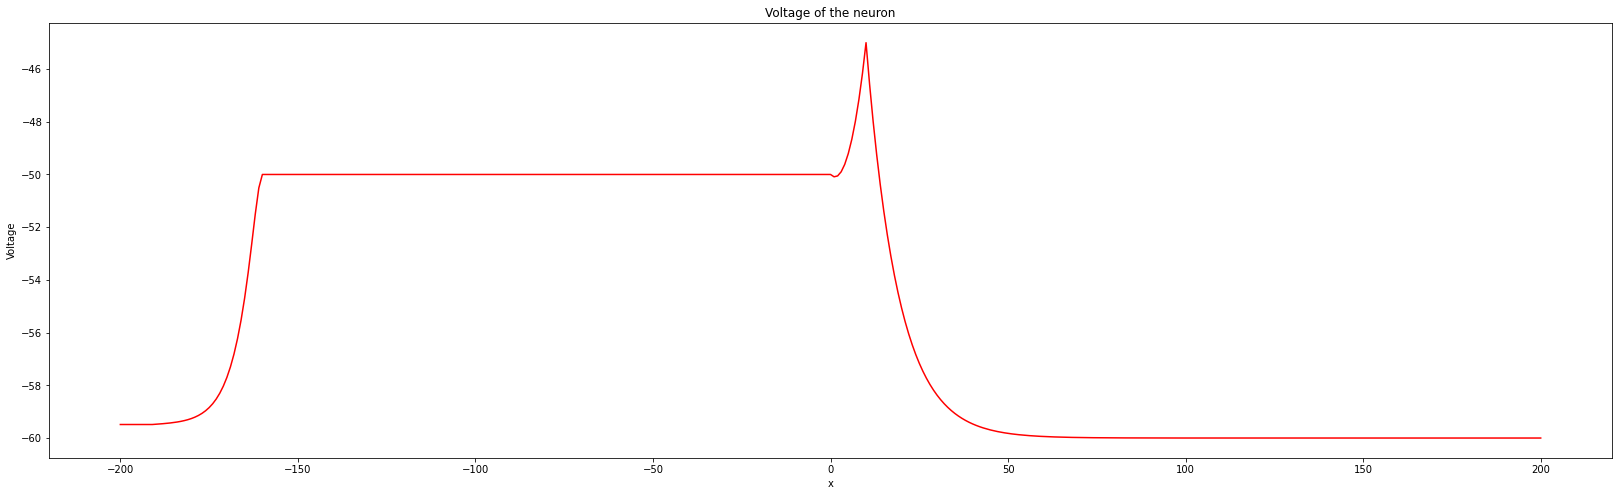

In [ ]:
myplot(V, 5999)

# Examining the axon equation

In [ ]:

DT=4
Lambda = 20
V_T=-57
E_l=-60
tau=20
V_init = -60

def axon(DT = 4):

  Delta = V_T - V_init


  # Creating the baseline voltage of the neuron.
  V_lin = abs(  -np.arange( Delta  ) )

  V_exp =  DT * np.exp(  np.flip( - np.arange(V_T - V_init) )  / DT  )  



  print('DT = ', DT)

  fig, ax = plt.subplots()
  
  plt.xlabel("V_init - V_T")
  plt.ylabel("Voltage")
  plt.title("Terms in the axon spike")
  

  ax.plot( np.linspace(-Delta, 0, Delta), V_exp, 'r-', label = 'Exponential')
  ax.plot( np.linspace(-Delta, 0, Delta), V_lin, 'b-', label = 'Linear')
  leg = ax.legend()



DT =  1.9


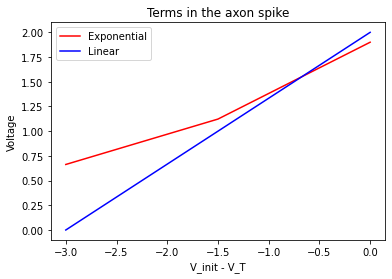

In [ ]:
# The equation in question:
# E_l - V + DT * np.exp( (V - V_T)/DT )
# Where E_l - V is the linear term and DT * np.exp( (V - V_T)/DT )
axon(DT = 1.9)

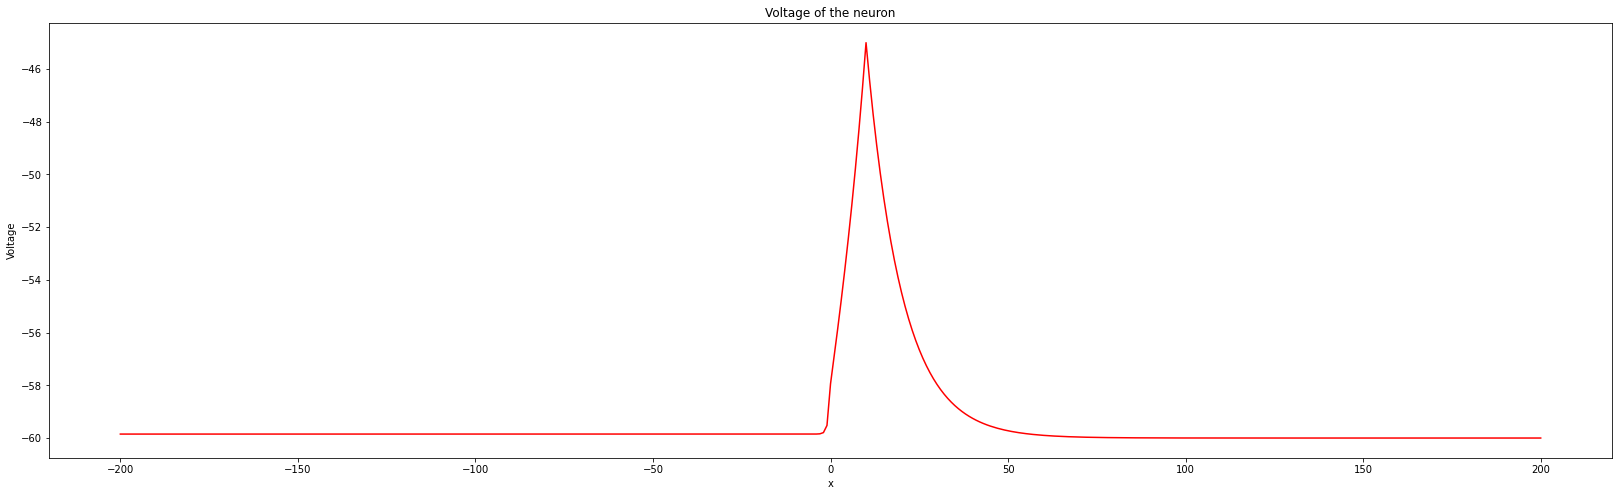

In [ ]:
V = simulate_new(DT = 1, V1 = -52, V_T = -55, Lambda = 50)
myplot(V, 5999)

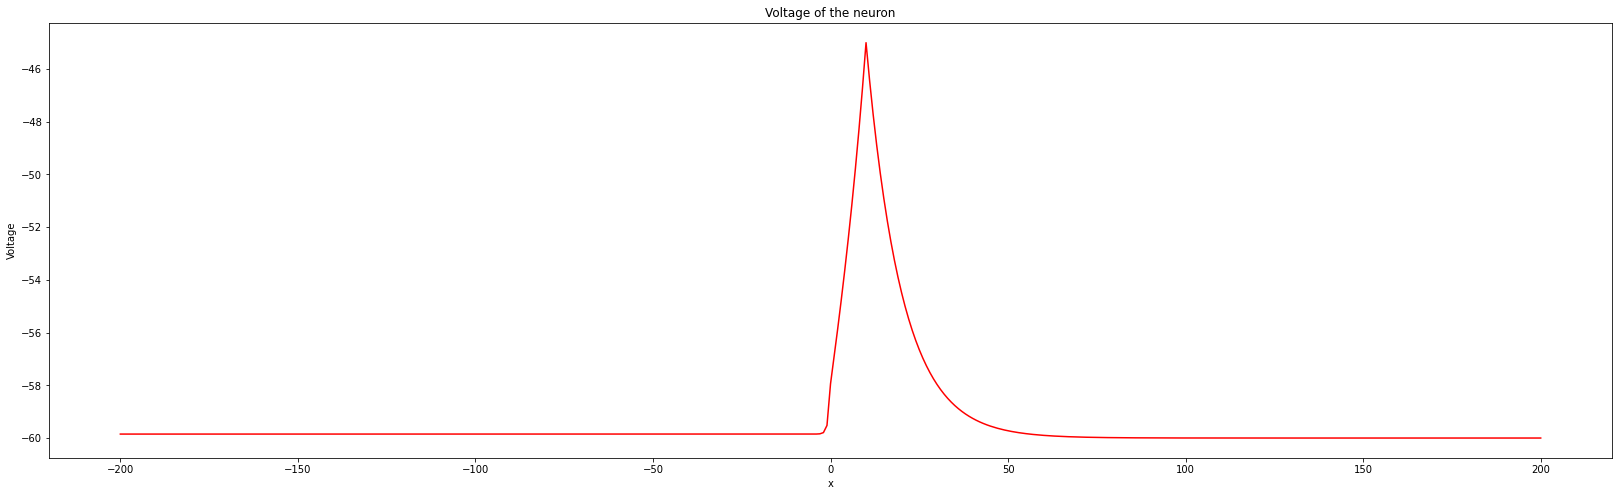

In [ ]:
myplot(V, 5999)

# Calculating the area under the dV/dt graph.

In [3]:

def Equation_1( V, E_l, V_T, DT, tau, V1 ):


  if V >= V1:
    return (1/tau) * ( E_l - V1 + DT * np.exp( ( V1 - V_T ) / DT ) )

  return  (1/tau) * ( E_l - V + DT * np.exp( ( V - V_T ) / DT ) )


In [ ]:
# Trapezoidal integration
# The integrand of Eq. 16 tends to ~ 1.25 at z = 0, and becomes negligible ~ 7
def integrate_trapezoid(n, initial, final, tau, E_l, V_T, DT, V1):

  sum = 0

  # Trapezoidal integration.
  # Write this as a function
  for i in range(n - 1):

    a = initial + i * (final - initial)/n
    b = initial + ( i + 1 ) * ( final - initial )/n
    trap = (1/2) * ( b - a ) * ( Equation_1( b, E_l, V_T, DT, tau, V1) + Equation_1( a, E_l, V_T, DT, tau, V1) )
    sum = sum + trap
  return sum

In [ ]:
# V1 = -52.8055 is the critical value for n = 20, initial = -60, final =  -50, tau =  20, E_l = -60, V_T = -56, DT = 1.9.
print( integrate_trapezoid( 20, -60, -50, 20, -60, -56, 3.5, -50.5 ) ) 

0.501380872109477


In [4]:
n, initial, final, tau, E_l, V_T, DT, V1 = 20, -60, -50, 20, -60, -56, 3.5, -50.5

V = np.ones( n )

for i in range( n ):

    a = initial + i * (final - initial)/n
    V[ i ] = Equation_1( a, E_l, V_T, DT, tau, V1 )

In [7]:
def myplot2(V):

  plt.figure(figsize=(28,8))
  plt.xlabel("V")
  plt.ylabel("dV/dt")
  plt.title("Finding dV/dt")
  plt.plot( np.linspace(initial, final, 20), V, 'r-')
  plt.plot( np.linspace(initial, final, 20), np.zeros(20), 'b-')

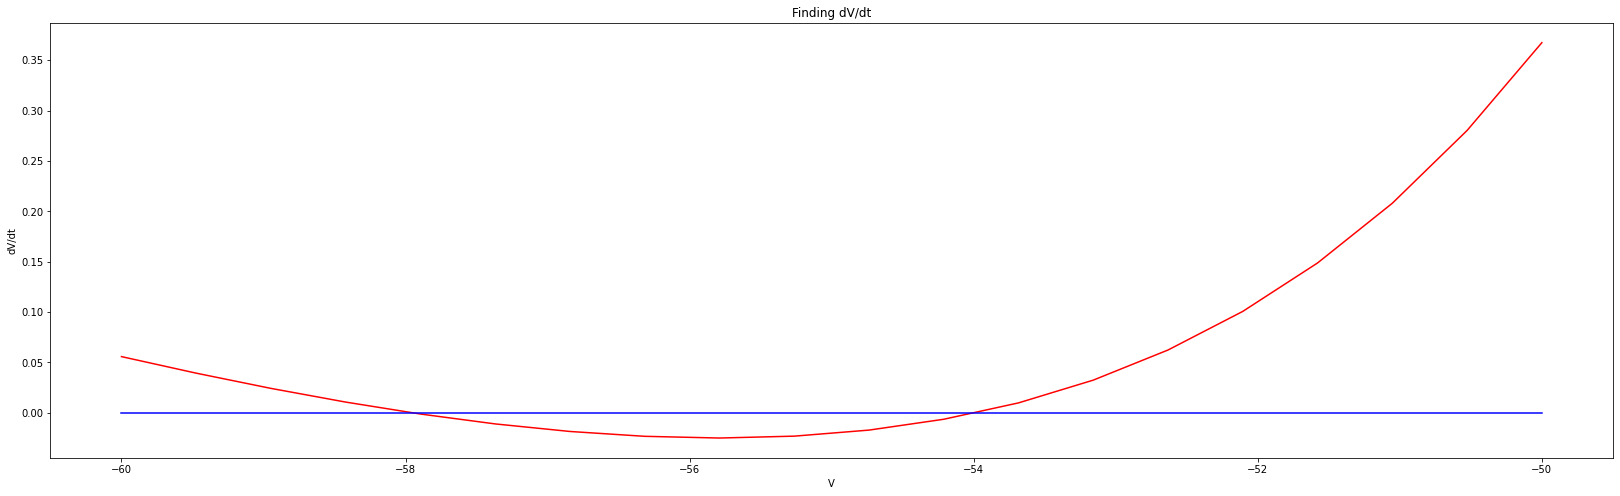

In [8]:
myplot2(V)

## Finding the value of c.

t =  99.95 ms : -35 t =  149.95 ms : -35 t =  199.95 ms : -35


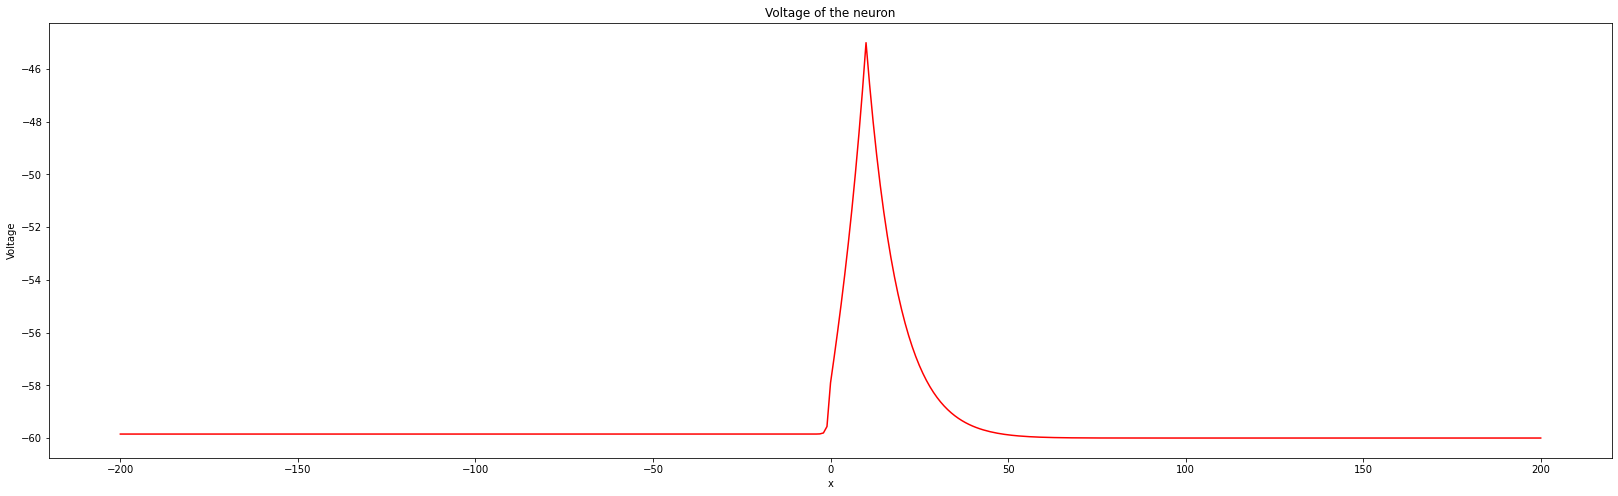

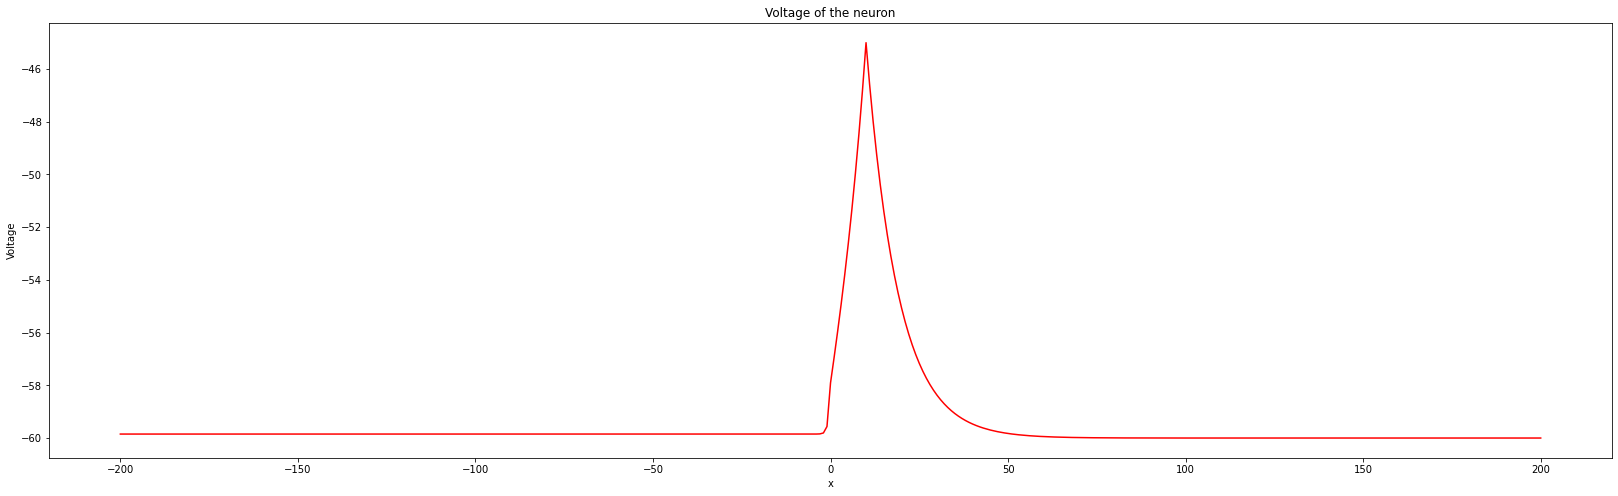

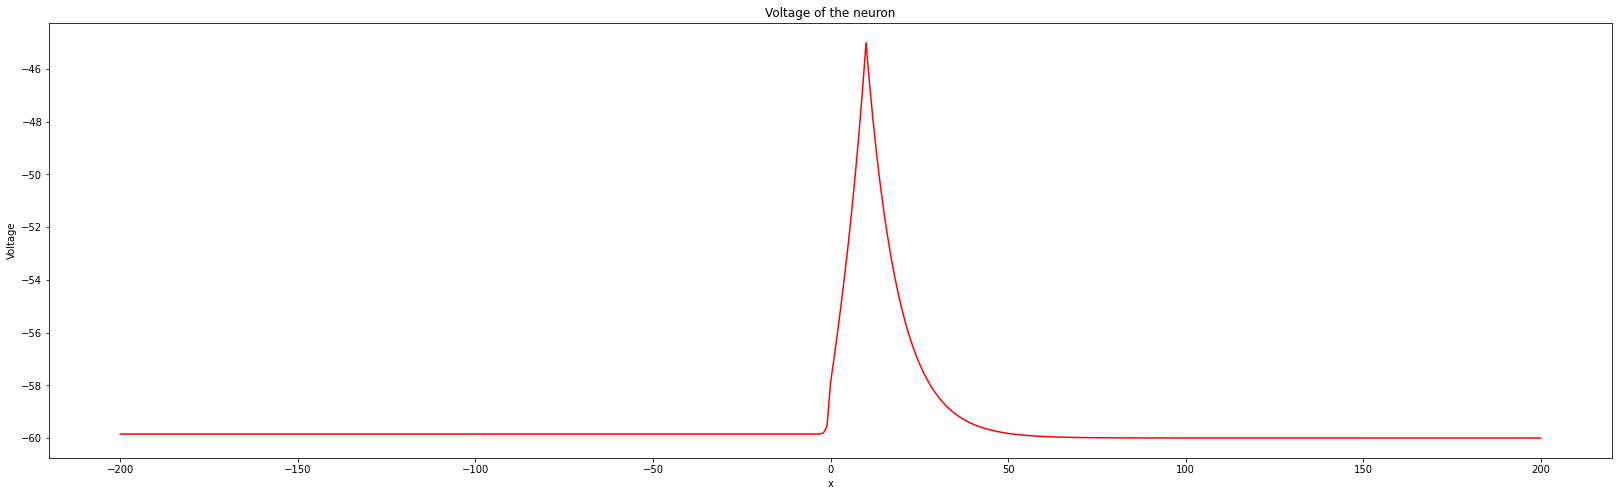

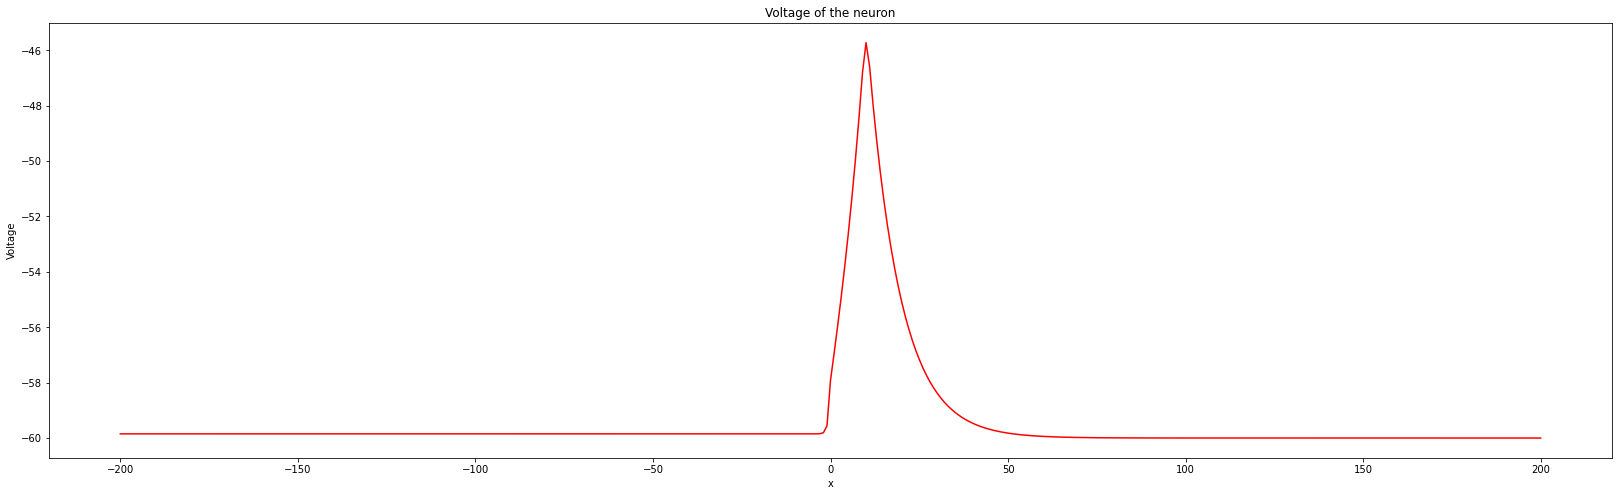

In [ ]:
V_th = -50



#V = simulate(DT = 1.9, Lambda = 45)
V = simulate_new( E_l = -60, V_th = -50, DT = 1.9, Lambda = 45, V_T = -56, V1 = -50.5)

print( "t = ", round( 1999 * dt, 2),"ms :", dx * ( nx - np.argmax( V[:, 1999] >= V_th ) ), "t = ", round( 2999 * dt, 2 ),"ms :", dx * (nx - np.argmax( V[:, 2999] >= V_th ) ), "t = ", round( 3999 * dt, 2 ),"ms :", dx * (nx - np.argmax( V[:, 3999] >= V_th ) ) )


myplot(V, 999)
myplot(V, 1999)
#myplot(V, 2999)
#myplot(V, 3999)
myplot(V, 9999)
myplot(V, 11999)
